# Distribution
Show values in a dataset and how often they occur. The shape (or skew) of a distribution can be a memorable way of highlighting the lack of uniformity or equality in the data.

In [2]:
import pandas as pd
import numpy as np
#ggplot equivalent: plotnine
from plotnine import *
#scales package equivalent: mizani
from mizani.breaks import *
from mizani.formatters import *
import utils

## Histogram
The standard way to show a statistical distribution - keep the gaps between columns small to highlight the 'shape' of the data.

In [3]:
df = pd.read_csv('data/histogram.csv')
df.head()

,Bin,CountV
0,68,1
1,66,1
2,64,2
3,62,8
4,60,15


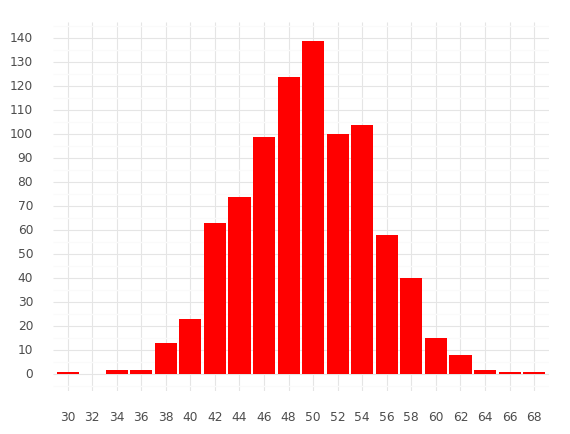

<ggplot: (-9223363259264353322)>

In [4]:
g = (ggplot(df,aes(x='factor(Bin)',y='CountV')) + #treat bin as factor not numerical
     geom_col(fill='red') + #change bar colors
     theme_minimal() + #minimal theme
     labs(x='',y='') + #no labels
     scale_y_continuous(limits=(0,140),breaks=range(0,141,10),labels=range(0,141,10)) #y-axis ticks
    )
g

In [5]:
vals=[]
for i in range(df.shape[0]):
    for j in range(df['CountV'][i]):
        vals.append(df['Bin'][i])
df2 = pd.DataFrame({'idx':range(len(vals)), 'val':vals})
df2.head()

,idx,val
0,0,68
1,1,66
2,2,64
3,3,64
4,4,62


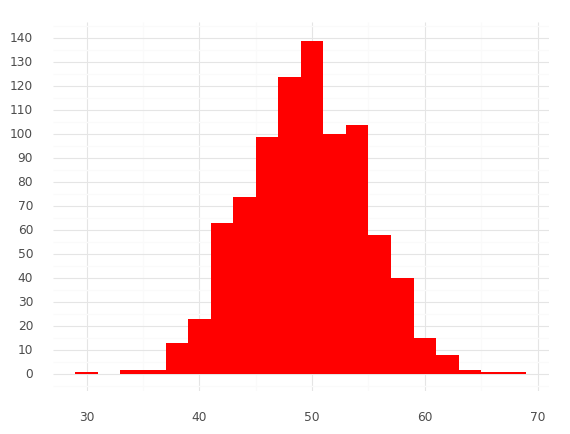

<ggplot: (-9223363259266770246)>

In [6]:
g = (ggplot(df2,aes(x='val')) + #treat bin as factor not numerical
     geom_bar(stat='bin',bins=20, fill='red') + #use geom_bar for histogram
     theme_minimal() + #minimal theme
     labs(x='',y='') + #no labels
     scale_y_continuous(limits=(0,140),breaks=range(0,141,10),labels=range(0,141,10)) #y-axis ticks
    )
g

## Dot plot
A simple way of showing the range (min/median/max) of data across multiple categories.

In [7]:
df = pd.read_csv('data/dot-plot.csv')
df.head()

,Sub-Category,Year,Profit
0,Supplies,2018,-955.31
1,Storage,2018,7402.80
2,Paper,2018,12040.84
3,Labels,2018,1744.61
4,Fasteners,2018,304.95


In [8]:
#aggregate to get min, median and max
agg_df = df.groupby('Sub-Category').agg({'Profit':[np.min,np.median,np.max]}).reset_index()
agg_df.columns = ['Sub-Category','min','median','max']
agg_df

,Sub-Category,min,median,max
0,Appliances,2511.90,5301.34,7865.27
1,Art,1413.96,1485.06,2221.96
2,Binders,7596.67,7669.74,10215.63
3,Envelopes,1441.76,1960.19,2066.75
4,Fasteners,171.94,294.07,304.95
5,Labels,1192.61,1323.03,1744.61
6,Paper,6570.17,9071.53,12040.84
7,Storage,3505.46,6204.29,7402.80
8,Supplies,-955.31,-698.96,-24.88


In [9]:
#melt
agg_m = agg_df.melt(id_vars='Sub-Category')
agg_m.head()

,Sub-Category,variable,value
0,Appliances,min,2511.90
1,Art,min,1413.96
2,Binders,min,7596.67
3,Envelopes,min,1441.76
4,Fasteners,min,171.94


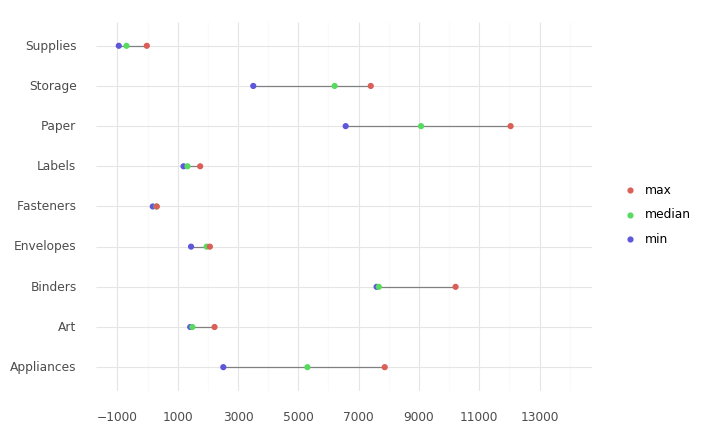

<ggplot: (8777588041480)>

In [10]:
g = (ggplot(agg_m,aes(x='Sub-Category',y='value',color='variable',group='Sub-Category')) + 
     geom_line(color='grey') + geom_point() + theme_minimal() + coord_flip() +
     scale_y_continuous(limits=(agg_m.value.min(),14000), 
                        breaks=range(-1000,14000,2000)) + #y-axis ticks
     labs(color='', x='',y=''))
g

## Dot strip plot
Good for showing individual values in a distribution, can be a problem when too many dots have the same value.

In [11]:
df = pd.read_csv('data/dot-strip-plot.csv')
df.head()

,Month of Order Date,Sub-Category,Sales
0,January,Accessories,5477.91
1,February,Accessories,5369.28
2,March,Accessories,8766.64
3,April,Accessories,7951.71
4,May,Accessories,9613.10


In [12]:
#custom formatter
f = utils.k_format()

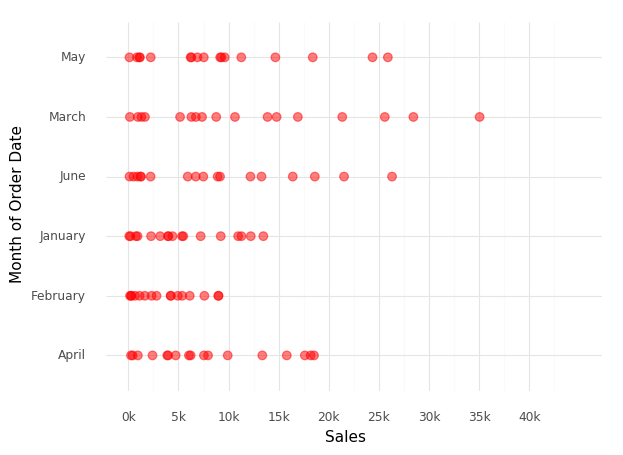

<ggplot: (8777587933886)>

In [13]:
g = (ggplot(df, aes(x='Month of Order Date',y='Sales')) + 
     geom_point(alpha=0.5,color='red',size=3) + #points with decorations
     theme_minimal() + coord_flip() +
     scale_y_continuous(limits=(0,45000),breaks=range(0,45000,5000),
                       labels=f) 
    )
g

## Barcode plot
Like dot strip plots, good for displaying all the data in a table,they work best when highlighting individual values.

In [14]:
df = pd.read_csv('data/barcode-plot.csv')
df.head()

,State,Sub-Category,Avg Sales
0,Wisconsin,Supplies,21.81
1,Wisconsin,Storage,111.91
2,Wisconsin,Paper,154.72
3,Wisconsin,Labels,29.64
4,Wisconsin,Fasteners,1.81


In [15]:
#custom formatter
f = utils.k_format()

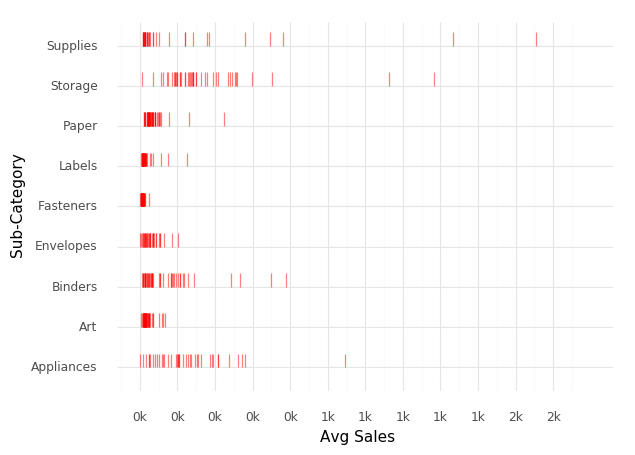

<ggplot: (8777587981025)>

In [16]:
g = (ggplot(df, aes(x='Sub-Category',y='Avg Sales')) + 
     geom_jitter(alpha=0.5,color='red',size=5, 
                 position=position_dodge(0.8),
                 shape=2) + #jitter with shape selection
     theme_minimal() + coord_flip() +
     scale_y_continuous(limits=(0,2400),breaks=range(0,2400,200),
                       labels=f) 
    )
g

## Boxplot
Summarise multiple distributions by showing the median (centre) and range of the data.

In [17]:
df = pd.read_csv('data/boxplot.csv')
df.head()

,Region,Segment,Sub-Category,Profit
0,West,Home Office,Tables,-113.56
1,West,Corporate,Tables,1074.20
2,West,Consumer,Tables,521.97
3,South,Home Office,Tables,-657.33
4,South,Corporate,Tables,-1388.22


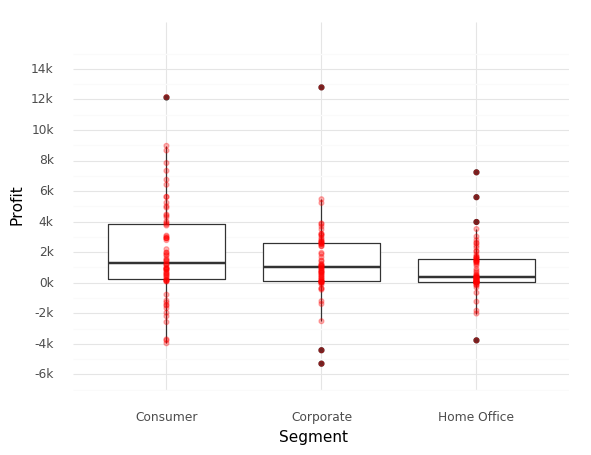

<ggplot: (8777587935166)>

In [18]:
g = (ggplot(df, aes(x='Segment',y='Profit')) + 
     geom_boxplot() + 
     geom_jitter(position=position_dodge(1),alpha=0.3,color='red') +
     theme_minimal() +
     scale_y_continuous(limits=(-6000,16000),
                        breaks=range(-6000,16000,2000),
                        labels=f) 
    )
g

## Violin plot
Similar to a box plot but more effective with complex distributions (data that cannot be summarised with simple average).

In [19]:
df = pd.read_csv('data/violin-plot.csv')

df.head()

,Avg Salary
0,26007.0
1,26007.0
2,26007.0
3,26007.0
4,32842.0


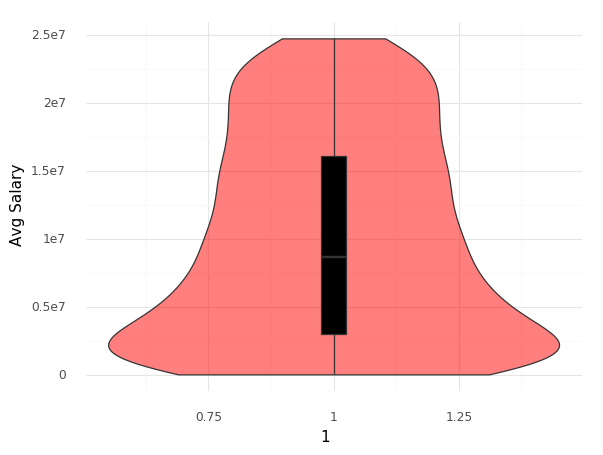

<ggplot: (8777587914311)>

In [20]:
g = (ggplot(df, aes(x=1, y='Avg Salary')) + 
     geom_violin(fill='red',alpha=0.5) + 
     geom_boxplot(width=0.05,fill='black') +
     theme_minimal() 
    )
g

## Population pyramid
A standard way for showing the age and sex breakdown of a population distribution; effectively, back to back histograms.

In [21]:
df = pd.read_csv('data/population-pyramid.csv')
df['people'] = df.apply(lambda x: -x['people'] if x['sex']=='female' else x['people'], 1)
df.head()

,age,sex,people
0,0,male,9735380
1,0,female,-9310714
2,5,male,10552146
3,5,female,-10069564
4,10,male,10563233


In [22]:
#custom formatter
f = utils.m_format()

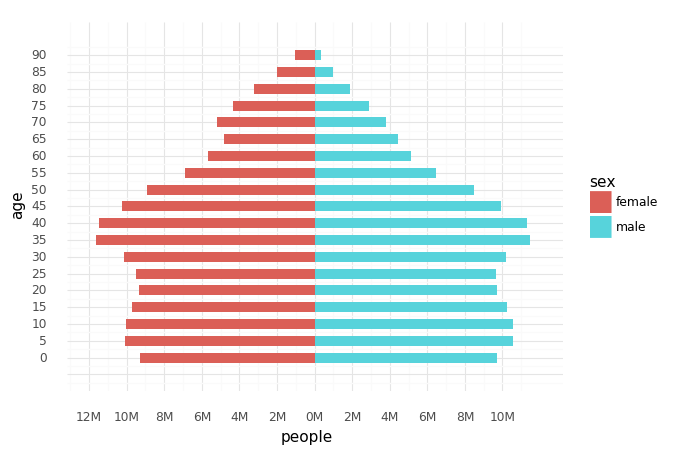

<ggplot: (-9223363259266914055)>

In [23]:
g = (ggplot(df, aes(x='age',y='people', fill='sex')) + #baseplot
    geom_col(width=3) + #type of plot
    coord_flip() + #flip coordinates
    theme_minimal() + #theme
    scale_x_continuous(limits=(-5,95),
                       breaks=range(-5,95,5),
                       labels=lambda x: [i if i>=0 else '' for i in x]) + #cusotmize x-axis labels
    scale_y_continuous(breaks=range(int(-12*1e6),int(12*1e6),int(2*1e6)),   #breaks
                       limits=(-12*1e6, 12*1e6),                              #limits
                       labels=f)  #labels
    ) 
g

## Cumulative curve
A good way of showing how unequal a distribution is: y axis is always cumulative frequency, x axis is always a measure.

In [24]:
df = pd.read_csv('data/cumulative-curve.csv')
df.head()

,Months since First Purchase,Running Sum of Sales,Region
0,47,501239.8908,Central
1,46,482356.8200,Central
2,45,467201.8420,Central
3,44,455079.5058,Central
4,43,437736.5088,Central


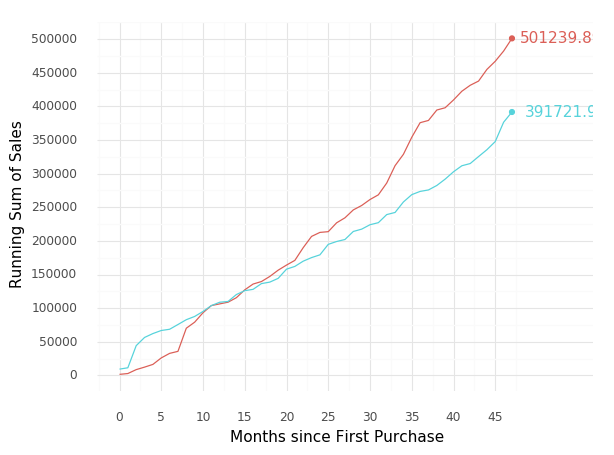

<ggplot: (-9223363259267004728)>

In [25]:
g = (ggplot(df, aes(x='Months since First Purchase', y='Running Sum of Sales',
                   color='Region', group='Region')) + geom_line() + 
     theme_minimal() + guides(color=False) +
     scale_x_continuous(breaks=range(0,50,5),
         labels=lambda x: [i if i%5==0 else '' for i in x]) + #show labels by modulus
     scale_y_continuous(breaks=range(0,600000,50000),
         labels=lambda x: [i if i%50000==0 else '' for i in x]) + #show labels by modulus
     #annotate last point
     geom_point(df[df['Months since First Purchase']==47],
               aes(x='Months since First Purchase', y='Running Sum of Sales')) +
     geom_text(df[df['Months since First Purchase']==47],
               aes(x='Months since First Purchase', y='Running Sum of Sales',
                  label='Running Sum of Sales'),
              nudge_x=7) #nudge it a bit to the right
    )
g

## Frequency polygons
For displaying multiple distributions of data. Like a regular line chart, best limited to a maximum of 3 or 4 datasets.

In [26]:
df = pd.read_csv('data/frequency-polygons.csv')
df.head()

,Time,Type,Frequency
0,350,A,0
1,350,B,0
2,450,A,5
3,450,B,0
4,550,A,10


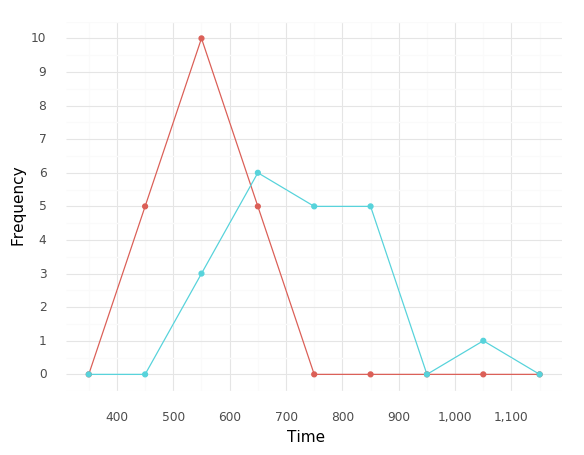

<ggplot: (8777581421646)>

In [27]:
g = (ggplot(df, aes(x='Time', y='Frequency',
                   color='Type', group='Type')) +
     geom_line() + geom_point() +
     theme_minimal() + guides(color=False) +
     scale_y_continuous(breaks=range(11),
         labels=lambda x: [i for i in x]) + 
     scale_x_continuous(breaks=range(0,1200,100),
         labels=currency_format(prefix='',big_mark=',',digits=0)) #currency format for nice numbers
    )
g

## Beeswarm
Use to emphasize individual points in a distribution. Points can be sized to an additional variable. Best with medium-sized datasets.

In [28]:
df = pd.read_csv('data/boxplot.csv')
df.head()

,Region,Segment,Sub-Category,Profit
0,West,Home Office,Tables,-113.56
1,West,Corporate,Tables,1074.20
2,West,Consumer,Tables,521.97
3,South,Home Office,Tables,-657.33
4,South,Corporate,Tables,-1388.22


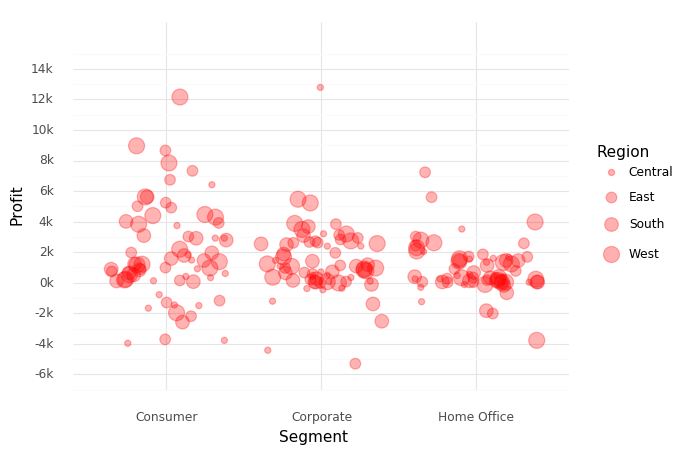

<ggplot: (8777587797992)>

In [36]:
g = (ggplot(df, aes(x='Segment',y='Profit',size='Region')) + 
     geom_jitter(position=position_jitter(),alpha=0.3,color='red') +
     theme_minimal() +
     scale_y_continuous(limits=(-6000,16000),
                        breaks=range(-6000,16000,2000),
                        labels=utils.k_format()) 
    )
g